# https://blog.csdn.net/qq_45590504/article/details/124535585

In [1]:
import pandas as pd
import numpy as np

pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [7]:
from sklearn.preprocessing import LabelEncoder#调用LabelEncoder函数用于数据转换
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']#将需要的列放入安全区
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)#删去不需要的列
new_pumpkins.dropna(inplace=True)#清理异常值
new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)#对离散值进行连续化转换，用于回归分析

In [8]:
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   City Name  991 non-null    int64
 1   Package    991 non-null    int64
 2   Variety    991 non-null    int64
 3   Origin     991 non-null    int64
 4   Item Size  991 non-null    int64
 5   Color      991 non-null    int64
dtypes: int64(6)
memory usage: 54.2 KB


In [9]:
new_pumpkins

,City Name,Package,Variety,Origin,Item Size,Color
2,1,3,4,3,3,0
3,1,3,4,17,3,0
4,1,3,4,5,2,0
5,1,3,4,5,2,0
6,1,4,4,5,3,0
...,...,...,...,...,...,...
1694,12,3,5,4,6,1
1695,12,3,5,4,6,1
1696,12,3,5,4,6,1
1697,12,3,5,4,6,1


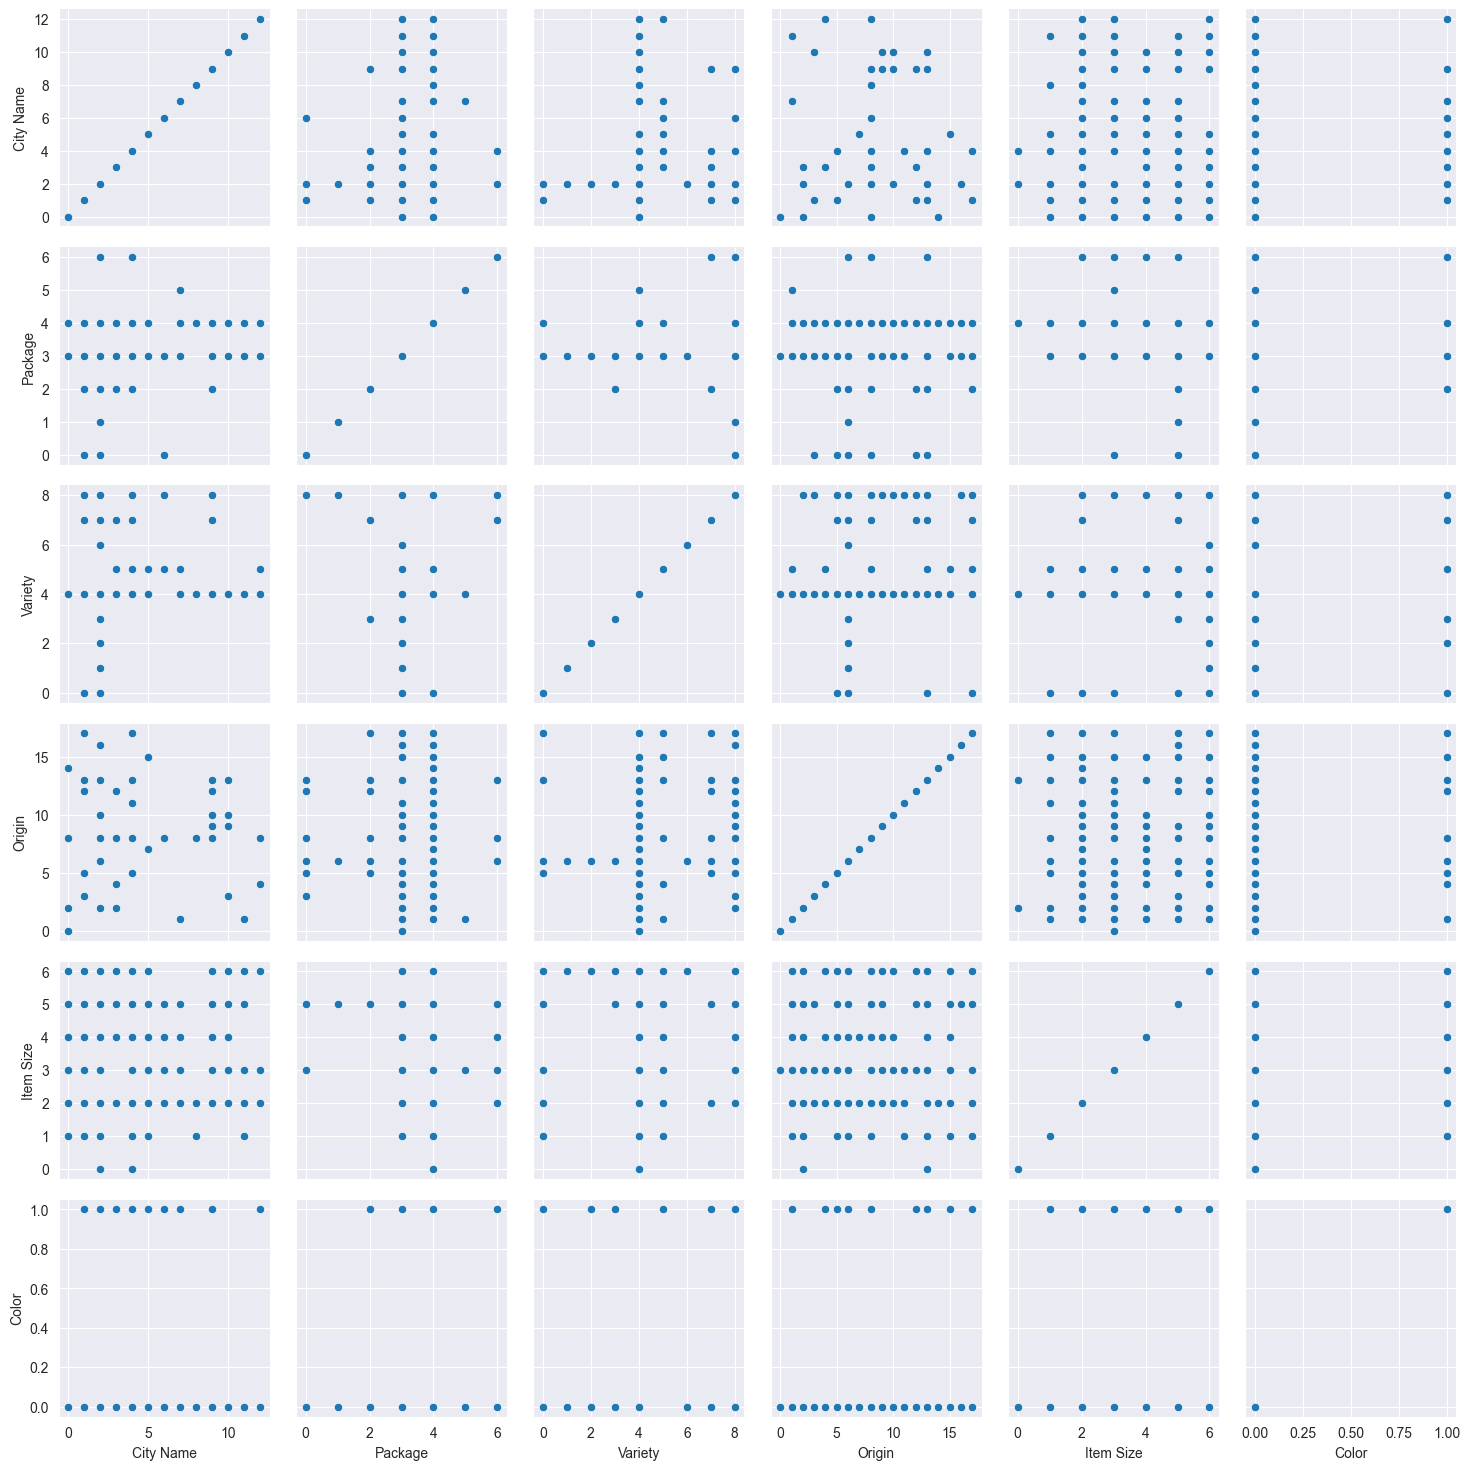

In [10]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)  # 调用Seaborn库的PairGrid()函数来创建网格对象g
g.map(sns.scatterplot)# 调用可视化网格对象g的map函数来以网格的形式输出[散点图]网格

/Users/kukudehui/Documents/01_编程学习/python/12_影像组学/venv/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kukudehui/Documents/01_编程学习/python/12_影像组学/venv/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Color', ylabel='Item Size'>

/Users/kukudehui/Documents/01_编程学习/python/12_影像组学/venv/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kukudehui/Documents/01_编程学习/python/12_影像组学/venv/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


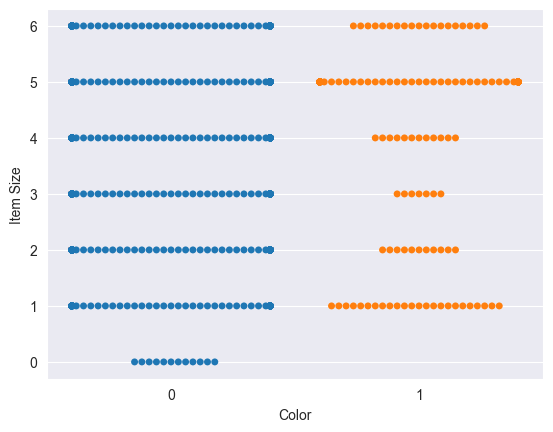

In [19]:
# 分簇散点图:可视化南瓜尺寸与颜色散点图的分布
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins, hue='Color', legend=False)

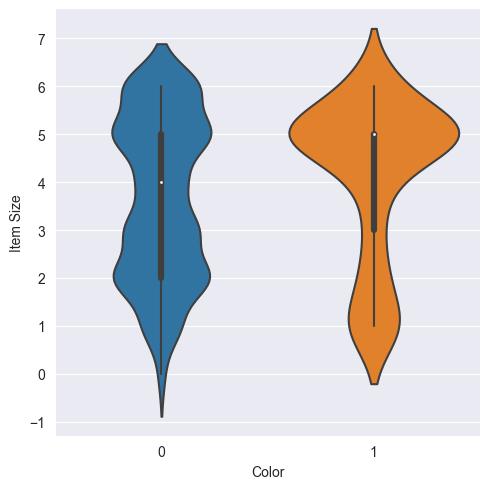

In [20]:
# 小提琴图:可视化两个类别中数据的分布方式
# 小提琴图在较小的数据集中效果不佳，数据越多分布显示越平滑。
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

In [21]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
Y = new_pumpkins['Color']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [22]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199



In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)

array([[162,   4],
       [ 33,   0]])

<AxesSubplot:>

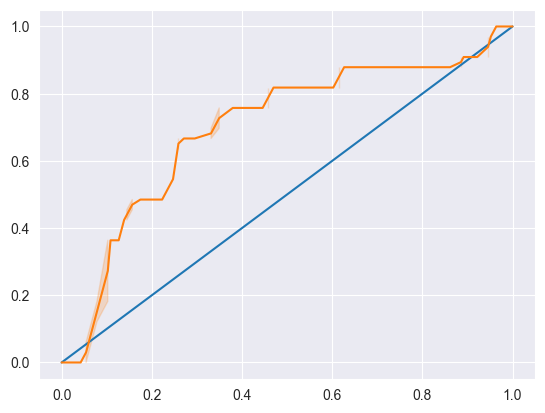

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

Y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores[:,1])
sns.lineplot(x=[0, 1], y=[0, 1])
sns.lineplot(x=fpr, y=tpr)

In [28]:
auc = roc_auc_score(Y_test,Y_scores[:,1])
print("AUC:",auc)

AUC: 0.6976998904709748
